In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.drop('Gender',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Education Level      373 non-null    object 
 2   Job Title            373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 17.5+ KB


In [7]:
for i in df.index:
    if isinstance(df.at[i, 'Job Title'], str):
        if 'Analyst' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Analyst'
        elif 'Engineer' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Engineer'
        elif 'Manager' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Manager'
        elif 'Developer' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Developer'
        elif 'Director' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Director'
        elif 'Designer' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Designer'
        elif 'Consultant' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Consultant'
        elif 'Sales' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Sales'
        elif 'VP' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'VP'
        elif 'Clerk' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Clerk'
        elif 'Scientist' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Scienntist'
        elif 'Marketing' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Marketing' 
        elif 'Assistant' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Assistant'
        elif 'Accountant' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Accountant'
        elif 'HR' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'HR'
        elif 'Human Resource' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'HR'
        elif 'Chief' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Chief'
        elif 'IT' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'IT'
        elif 'Operations' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Operations'
        elif 'Customer' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Customer Success'
        elif 'Coordinator' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Coordinator'
        elif 'Software' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'IT'
        elif 'Advisor' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Advisor'
        elif 'Training' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Trainer'
        elif 'Executive' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Executive'
        elif 'Business Development' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Business Developer'
        elif 'Writer' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Writer'
        elif 'Copywriter' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Writer'
        elif 'Recruiter' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Recruiter'
        elif 'Researcher' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Researcher'
        elif 'Social Media' in df.at[i, 'Job Title']:
            df.at[i, 'Job Title'] = 'Social Media Specialist'
            
            
#         else:
#             df.at[i, 'Job Title'] = 'Other'

print(df['Job Title'])

0        Engineer
1         Analyst
2         Manager
3           Sales
4        Director
          ...    
370       Analyst
371      Director
372       Manager
373    Operations
374       Analyst
Name: Job Title, Length: 373, dtype: object


In [8]:
df['Job Title'].unique()

array(['Engineer', 'Analyst', 'Manager', 'Sales', 'Director', 'Marketing',
       'Scienntist', 'Developer', 'Customer Success', 'Clerk', 'VP', 'IT',
       'Recruiter', 'Social Media Specialist', 'Consultant', 'Designer',
       'CEO', 'Accountant', 'Writer', 'HR', 'Assistant', 'Coordinator',
       'Researcher', 'Technical Support Specialist', 'Chief', 'Advisor',
       'Trainer', 'Digital Content Producer', 'Business Developer',
       'Executive', 'Operations'], dtype=object)

In [9]:
df.isnull().sum() #No null values

Age                    0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
for i in df.index:
    if isinstance(df.at[i, 'Education Level'], str):
        if "Bachelor's" in df.at[i, 'Education Level']:
            df.at[i, 'Education Level'] = 'Bachelors'
        elif "Master's" in df.at[i, 'Education Level']:
            df.at[i, 'Education Level'] = 'Masters'
        elif "PhD" in df.at[i, 'Education Level']:
            df.at[i, 'Education Level'] = 'Phd'

In [13]:
df

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,Bachelors,Engineer,5.0,90000.0
1,28.0,Masters,Analyst,3.0,65000.0
2,45.0,Phd,Manager,15.0,150000.0
3,36.0,Bachelors,Sales,7.0,60000.0
4,52.0,Masters,Director,20.0,200000.0
...,...,...,...,...,...
370,35.0,Bachelors,Analyst,8.0,85000.0
371,43.0,Masters,Director,19.0,170000.0
372,29.0,Bachelors,Manager,2.0,40000.0
373,34.0,Bachelors,Operations,7.0,90000.0


In [14]:
df['Age']=df['Age'].astype(int)

In [15]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary
0,32,Bachelors,Engineer,5.0,90000.0
1,28,Masters,Analyst,3.0,65000.0
2,45,Phd,Manager,15.0,150000.0
3,36,Bachelors,Sales,7.0,60000.0
4,52,Masters,Director,20.0,200000.0


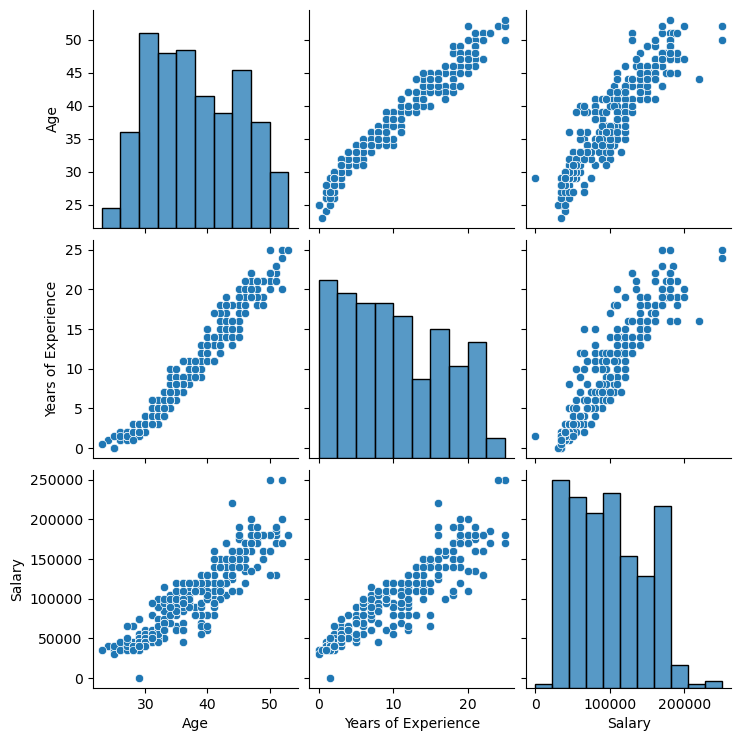

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


## Encoding

### Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Job Title'] = le.fit_transform(df['Job Title'])
df['Education Level'] = le.fit_transform(df['Education Level'])

In [19]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary
0,32,0,15,5.0,90000.0
1,28,1,2,3.0,65000.0
2,45,2,19,15.0,150000.0
3,36,0,24,7.0,60000.0
4,52,1,14,20.0,200000.0


In [21]:
x = df.iloc[:,:-1]
y = df['Salary']

In [65]:
y.value_counts()

40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: Salary, dtype: int64

## Split data into Train & Test

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary
0,32,0,15,5.0,90000.0
1,28,1,2,3.0,65000.0
2,45,2,19,15.0,150000.0
3,36,0,24,7.0,60000.0
4,52,1,14,20.0,200000.0


In [24]:
df['Job Title']

0      15
1       2
2      19
3      24
4      14
       ..
370     2
371    14
372    19
373    21
374     2
Name: Job Title, Length: 373, dtype: int32

In [25]:
df['Job Title'].nunique()

31

In [26]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [27]:
ypred

array([ 61738.24925099,  41139.90086472, 116504.43119482,  62131.72094334,
       122441.61921023,  49211.61622747, 169484.37261648, 178533.36274222,
       109212.43982044,  50685.92452942,  80952.65906967,  46982.35729575,
       104774.33346558, 124485.77682321,  46169.02968655,  43984.95562201,
       157980.19922313, 107093.96213165, 170572.4286224 ,  50188.89099046,
       125175.13107723,  52734.44399242, 128788.32857654, 157980.19922313,
       153327.74977873, 175695.52738125,  80246.49350974, 172148.68790506,
        46937.17242857,  66558.24605185, 172756.50268694, 159712.42461589,
        52562.48150485, 164775.15705855,  54918.51805696, 161161.95955924,
       129528.0977573 ,  54150.37531494, 132155.19023139, 152182.92765927,
        83904.87587623,  54150.37531494, 121213.64675275, 153327.74977873,
        79523.5356349 , 146245.73964386, 125836.11176998,  30432.26276565,
       157980.19922313, 165756.03202421,  54240.7450493 , 142501.34939304,
       159732.83612446,  

In [28]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    print(accuracy_score(ytest,ypred))
    return model    

In [29]:
ypred

array([ 61738.24925099,  41139.90086472, 116504.43119482,  62131.72094334,
       122441.61921023,  49211.61622747, 169484.37261648, 178533.36274222,
       109212.43982044,  50685.92452942,  80952.65906967,  46982.35729575,
       104774.33346558, 124485.77682321,  46169.02968655,  43984.95562201,
       157980.19922313, 107093.96213165, 170572.4286224 ,  50188.89099046,
       125175.13107723,  52734.44399242, 128788.32857654, 157980.19922313,
       153327.74977873, 175695.52738125,  80246.49350974, 172148.68790506,
        46937.17242857,  66558.24605185, 172756.50268694, 159712.42461589,
        52562.48150485, 164775.15705855,  54918.51805696, 161161.95955924,
       129528.0977573 ,  54150.37531494, 132155.19023139, 152182.92765927,
        83904.87587623,  54150.37531494, 121213.64675275, 153327.74977873,
        79523.5356349 , 146245.73964386, 125836.11176998,  30432.26276565,
       157980.19922313, 165756.03202421,  54240.7450493 , 142501.34939304,
       159732.83612446,  

In [30]:
ytest

67      45000.0
348     35000.0
343    150000.0
295     60000.0
90     120000.0
         ...   
78     180000.0
176    140000.0
269    110000.0
306    180000.0
82      30000.0
Name: Salary, Length: 75, dtype: float64

## Evaluate the Model

In [31]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9191397287652168

## Accuracy

In [33]:
# Train linear regression model
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

In [34]:
# Evaluate linear regression model using R-squared and RMSE scores
r2_lr = r2_score(ytest, ypred_lr)
mse_lr = mean_squared_error(ytest, ypred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression - R-squared: {r2_lr}, RMSE: {rmse_lr}')


NameError: name 'mean_squared_error' is not defined

In [35]:
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [36]:
mymodel(knn)

              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.00      0.00      0.00         2
     40000.0       0.46      0.86      0.60         7
     45000.0       1.00      0.17      0.29         6
     50000.0       0.80      0.67      0.73         6
     55000.0       0.33      0.33      0.33         3
     60000.0       0.50      0.33      0.40         3
     65000.0       0.00      0.00      0.00         1
     70000.0       0.33      1.00      0.50         1
     80000.0       0.00      0.00      0.00         2
     85000.0       0.50      1.00      0.67         1
     90000.0       1.00      0.25      0.40         4
     95000.0       0.00      0.00      0.00         1
    100000.0       0.00      0.00      0.00         2
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    115000.0       0.00      0.00      0.00         1
    120000.0       0.00    

KNeighborsClassifier()

In [37]:
mymodel(svm)

              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.00      0.00      0.00         2
     40000.0       0.27      1.00      0.42         7
     45000.0       0.00      0.00      0.00         6
     50000.0       0.00      0.00      0.00         6
     55000.0       0.00      0.00      0.00         3
     60000.0       0.00      0.00      0.00         3
     65000.0       0.00      0.00      0.00         1
     70000.0       0.00      0.00      0.00         1
     80000.0       0.00      0.00      0.00         2
     85000.0       0.00      0.00      0.00         1
     90000.0       0.00      0.00      0.00         4
     95000.0       0.00      0.00      0.00         1
    100000.0       0.00      0.00      0.00         2
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    115000.0       0.00      0.00      0.00         1
    120000.0       0.18    

SVC()

In [38]:
mymodel(dt)

              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.67      1.00      0.80         2
     40000.0       0.67      0.86      0.75         7
     45000.0       1.00      0.17      0.29         6
     50000.0       0.67      0.67      0.67         6
     55000.0       0.25      0.33      0.29         3
     60000.0       0.33      0.33      0.33         3
     65000.0       0.00      0.00      0.00         1
     70000.0       0.33      1.00      0.50         1
     80000.0       0.00      0.00      0.00         2
     85000.0       1.00      1.00      1.00         1
     90000.0       1.00      0.25      0.40         4
     95000.0       0.00      0.00      0.00         1
    100000.0       0.50      0.50      0.50         2
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    115000.0       0.00      0.00      0.00         1
    120000.0       0.25    

DecisionTreeClassifier()

## Hypertunning DT

### Max_depth

In [39]:
for i in range(50,150):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=r2_score(ytest,ypred)
    print(f'max_depth: {i} Accuracy : {ac}')

max_depth: 50 Accuracy : 0.8707131425359759
max_depth: 51 Accuracy : 0.8479658525050293
max_depth: 52 Accuracy : 0.8583756292988522
max_depth: 53 Accuracy : 0.8460381160617287
max_depth: 54 Accuracy : 0.8443674111442016
max_depth: 55 Accuracy : 0.8489939786081229
max_depth: 56 Accuracy : 0.8320298979070779
max_depth: 57 Accuracy : 0.8360138865565658
max_depth: 58 Accuracy : 0.8416685801235808
max_depth: 59 Accuracy : 0.8525924199689506
max_depth: 60 Accuracy : 0.8366564653709994
max_depth: 61 Accuracy : 0.8475803052163692
max_depth: 62 Accuracy : 0.8505361677627633
max_depth: 63 Accuracy : 0.8385842018142999
max_depth: 64 Accuracy : 0.8722553316906163
max_depth: 65 Accuracy : 0.8655725120205077
max_depth: 66 Accuracy : 0.8376845914740929
max_depth: 67 Accuracy : 0.8582471135359656
max_depth: 68 Accuracy : 0.8558053140411181
max_depth: 69 Accuracy : 0.8426967062266744
max_depth: 70 Accuracy : 0.8525924199689506
max_depth: 71 Accuracy : 0.8506646835256501
max_depth: 72 Accuracy : 0.85567

In [40]:
dt2=DecisionTreeClassifier(max_depth=146)
mymodel(dt2) #76

              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.67      1.00      0.80         2
     40000.0       0.67      0.86      0.75         7
     45000.0       1.00      0.33      0.50         6
     50000.0       0.71      0.83      0.77         6
     55000.0       0.33      0.33      0.33         3
     60000.0       0.50      0.33      0.40         3
     65000.0       0.00      0.00      0.00         1
     70000.0       1.00      1.00      1.00         1
     80000.0       0.00      0.00      0.00         2
     85000.0       1.00      1.00      1.00         1
     90000.0       0.50      0.25      0.33         4
     95000.0       0.00      0.00      0.00         1
    100000.0       0.25      0.50      0.33         2
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    115000.0       0.00      0.00      0.00         1
    120000.0       0.25    

DecisionTreeClassifier(max_depth=146)

In [42]:
train=dt2.score(xtrain,ytrain)
test=dt2.score(xtest,ytest)
print(f'Train score :{train} \n Test Score {test}')#176 overfit

Train score :0.9261744966442953 
 Test Score 0.4666666666666667


### Min Sample Split

In [43]:
for i in range(2,50):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=r2_score(ytest,ypred)
    print(f'max_depth: {i} Accuracy : {ac}')

max_depth: 2 Accuracy : 0.8599178184534928
max_depth: 3 Accuracy : 0.8365279496081126
max_depth: 4 Accuracy : 0.8340861501132653
max_depth: 5 Accuracy : 0.8366564653709994
max_depth: 6 Accuracy : 0.8379416229998664
max_depth: 7 Accuracy : 0.8750826784741238
max_depth: 8 Accuracy : 0.8363994338452259
max_depth: 9 Accuracy : 0.880608856278252
max_depth: 10 Accuracy : 0.8434678008039946
max_depth: 11 Accuracy : 0.8455240530101819
max_depth: 12 Accuracy : 0.8438533480926548
max_depth: 13 Accuracy : 0.8826651084844394
max_depth: 14 Accuracy : 0.8883198020514543
max_depth: 15 Accuracy : 0.8883198020514543
max_depth: 16 Accuracy : 0.8883198020514543
max_depth: 17 Accuracy : 0.8857494867937202
max_depth: 18 Accuracy : 0.8878057389999074
max_depth: 19 Accuracy : 0.891918243412282
max_depth: 20 Accuracy : 0.8915326961236218
max_depth: 21 Accuracy : 0.8926893379896023
max_depth: 22 Accuracy : 0.8772674464431978
max_depth: 23 Accuracy : 0.877138930680311
max_depth: 24 Accuracy : 0.8739260366081435

In [44]:
dt4=DecisionTreeClassifier(min_samples_split=36)
mymodel(dt4)

              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.50      1.00      0.67         2
     40000.0       0.88      1.00      0.93         7
     45000.0       0.00      0.00      0.00         6
     50000.0       0.50      1.00      0.67         6
     55000.0       0.00      0.00      0.00         3
     60000.0       0.50      0.33      0.40         3
     65000.0       0.00      0.00      0.00         1
     70000.0       0.00      0.00      0.00         1
     80000.0       0.00      0.00      0.00         2
     85000.0       1.00      1.00      1.00         1
     90000.0       0.50      0.25      0.33         4
     95000.0       0.00      0.00      0.00         1
    100000.0       0.00      0.00      0.00         2
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    115000.0       0.00      0.00      0.00         1
    120000.0       0.10    

DecisionTreeClassifier(min_samples_split=36)

In [45]:
from sklearn.linear_model import Ridge,Lasso

In [60]:
for i in range(1,100):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    test=l2.score(xtest,ytest)
    print(f'lambda {i} testscore {test}')

lambda 1 testscore 0.9192935935782061
lambda 2 testscore 0.919438970322522
lambda 3 testscore 0.9195762767643513
lambda 4 testscore 0.9197059074626233
lambda 5 testscore 0.9198282352419804
lambda 6 testscore 0.919943612559944
lambda 7 testscore 0.9200523727767738
lambda 8 testscore 0.9201548313357645
lambda 9 testscore 0.9202512868610385
lambda 10 testscore 0.9203420221792836
lambda 11 testscore 0.9204273052713233
lambda 12 testscore 0.9205073901589046
lambda 13 testscore 0.9205825177316346
lambda 14 testscore 0.9206529165185748
lambda 15 testscore 0.9207188034086361
lambda 16 testscore 0.9207803843235658
lambda 17 testscore 0.9208378548470136
lambda 18 testscore 0.9208914008128793
lambda 19 testscore 0.9209411988558809
lambda 20 testscore 0.920987416927058
lambda 21 testscore 0.9210302147766996
lambda 22 testscore 0.9210697444069968
lambda 23 testscore 0.9211061504965375
lambda 24 testscore 0.921139570798599
lambda 25 testscore 0.9211701365150435
lambda 26 testscore 0.9211979726474832

In [55]:
l2=Ridge(alpha=12)
l2.fit(xtrain,ytrain)

Ridge(alpha=12)

In [56]:
train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)
print(train,test)

0.8842612048992822 0.9205073901589046


In [57]:
l2=Ridge(alpha=102)
l2.fit(xtrain,ytrain)

train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)
print(train,test)

0.8776561296933282 0.9200032108318323
